# Data Pre-Processing
Serie di operazioni per "rifinire" i dati

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Loading data form file
data = pd.read_csv("data/neo_v2.csv")
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


Rimozione di alcune features risultate inutili per lo scopo e accorpamento di due features con la loro media 

In [3]:
# Combine the est_diameter_max and est_diameter_min into one column as mean
data["est_diameter_mean"] = (data["est_diameter_max"] + data["est_diameter_min"])/2
# Drop unusefulls features
data = data.drop(columns=["est_diameter_min", "est_diameter_max", "name", "orbiting_body", "sentry_object"])
#Change th position of columns
cols = data.columns.to_list()
cols = [cols[0]] + [cols[5]] + cols[1:5]
data = data[cols]
data.head()

,id,est_diameter_mean,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,1.938843,13569.249224,5.483974e+07,16.73,False
1,2277475,0.430073,73588.726663,6.143813e+07,20.00,True
2,2512244,1.168268,114258.692129,4.979872e+07,17.83,False
3,3596030,0.156150,24764.303138,2.543497e+07,22.20,False
4,3667127,0.412613,42737.733765,4.627557e+07,20.09,True


In [75]:
# Save processd data into new file
data.to_csv("data/NEO_v2_refined.csv", index=False)

/home/giuto/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


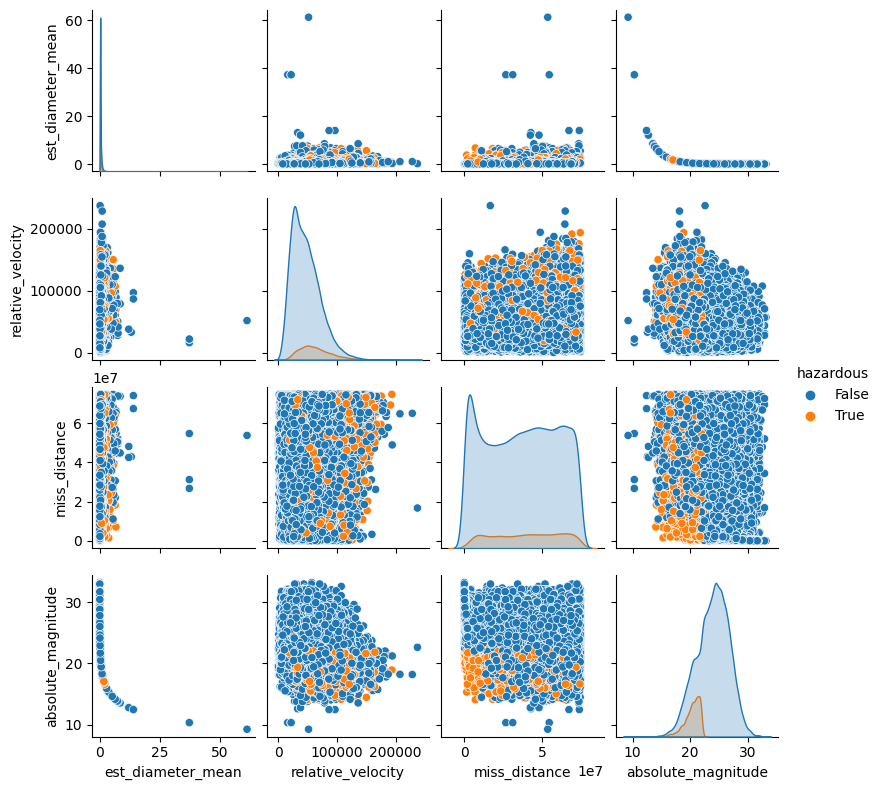

In [76]:
# Data visualization for highlight the unbalancing
data_plot = sns.pairplot(data.drop(columns=["id"]), hue='hazardous', size=2)
data_plot.figure.savefig("img/data_plot.png")

<AxesSubplot:xlabel='hazardous', ylabel='count'>

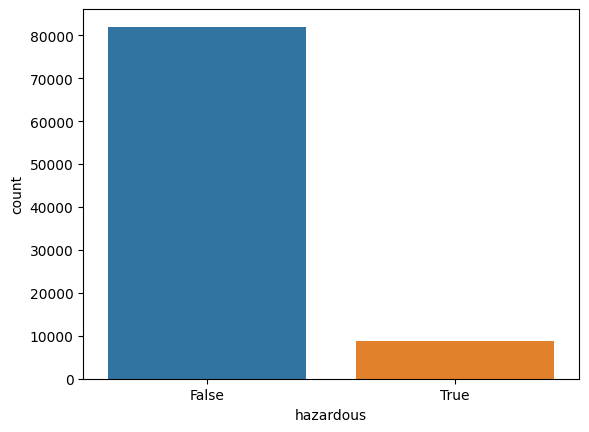

In [4]:
sns.countplot(x="hazardous", data=data)

Approccio ibrido per risolvere lo sbilanciamento delle classi

In [5]:
# Class imbalance resolution with hybrid approach
from imblearn.combine import SMOTEENN

X = data.drop(columns=["hazardous", "id"])
y = data["hazardous"]

sme = SMOTEENN(random_state=0, sampling_strategy=0.9)
X_res, y_res = sme.fit_resample(X, y)

In [6]:
# Dataframe reconstruction 
data_res = X_res
data_res["hazardous"] = y_res
data_res.to_csv("data/NEO_v2_refined_res.csv", index=False)

/home/giuto/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


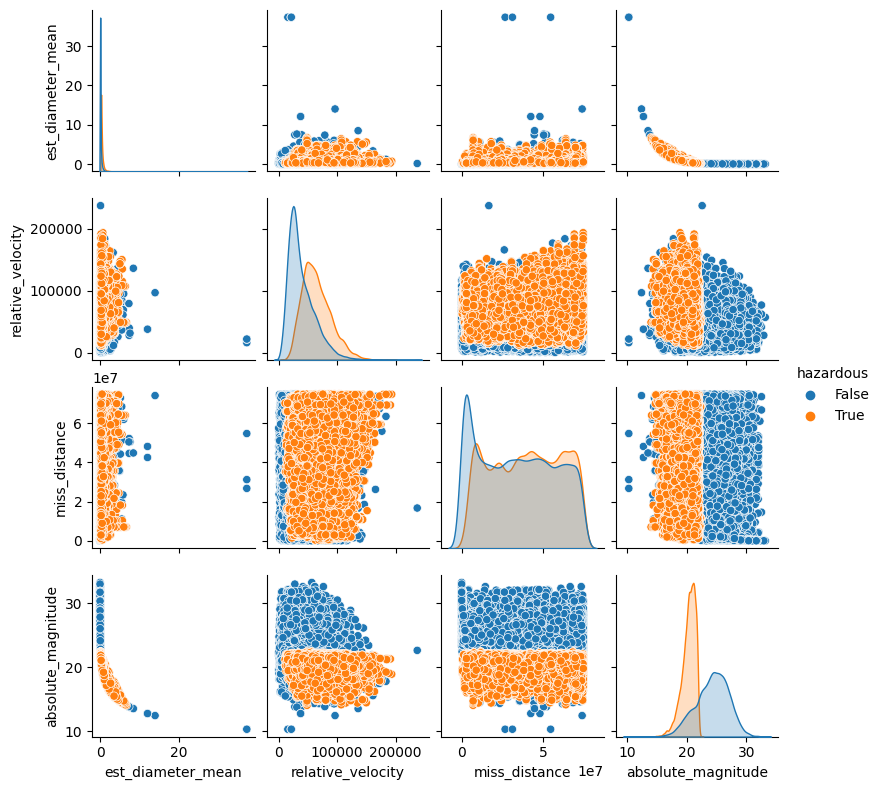

In [79]:
# Data visualization after resampling
data_res_plot = sns.pairplot(data_res, hue='hazardous', size=2)
data_res_plot.figure.savefig("img/data_res_plot.png")

<AxesSubplot:xlabel='hazardous', ylabel='count'>

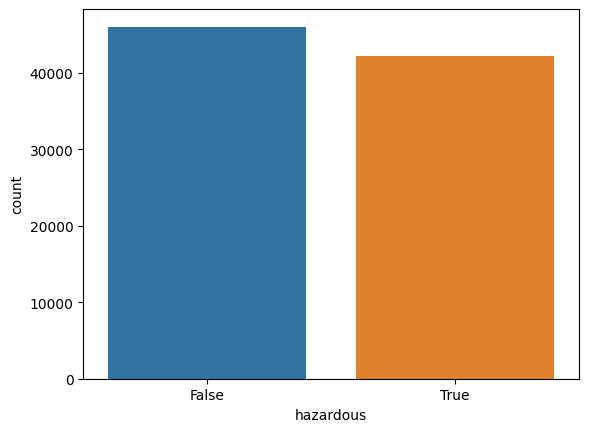

In [7]:
sns.countplot(x="hazardous", data=data_res)